Loading simulation data...

Attempting to load Scenario 1 from:
  C:\Users\venturasubirav2\Downloads\Scenario 1 Basal_NormDens_NormClust-20251205T165322Z-3-001\Scenario 1 Basal_NormDens_NormClust\CL(t)_Basal_NormDens_NormClust.txt
✓ Loaded: 37 points, Mean CL = 420.1 ms

Attempting to load Scenario 2 from:
  C:\Users\venturasubirav2\Downloads\Scenario 2 Basal_HighDens_NormClust-20251205T165842Z-3-001\Scenario 2 Basal_HighDens_NormClust\CL(t)_Basal_HighDens_NormClust.txt
✓ Loaded: 37 points, Mean CL = 422.3 ms

Attempting to load Scenario 3 from:
  C:\Users\venturasubirav2\Downloads\Scenario 3 Basal_NormDens_SuperClust-20251205T165326Z-3-001\Scenario 3 Basal_NormDens_SuperClust\CL(t)_Scenario 3 Basal_NormDens_SuperClust.txt
✓ Loaded: 49 points, Mean CL = 322.4 ms

Attempting to load Scenario 4 from:
  C:\Users\venturasubirav2\Downloads\Scenario 4 Basal_HighDens_SuperClust-20251205T165328Z-3-001\Scenario 4 Basal_HighDens_SuperClust\CL(t)_Scenario 4 Basal_HighDens_SuperClust2.txt
✓ Loaded

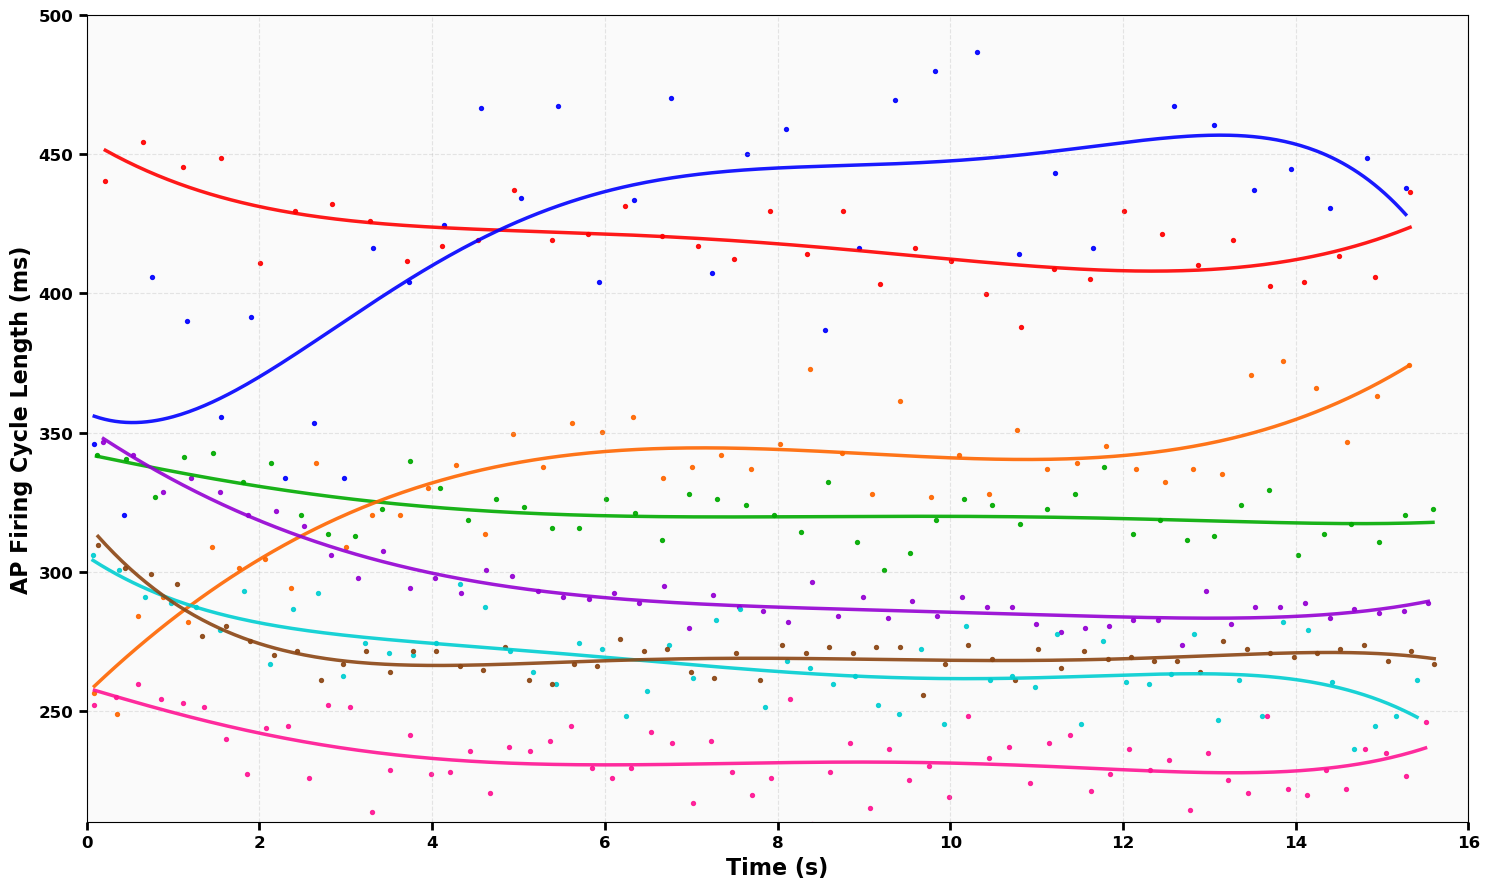


Summary Statistics:
Scenario 1: Mean=420.1 ms, SD=14.4 ms, Range=[387.8, 454.5] ms
Scenario 2: Mean=422.3 ms, SD=46.2 ms, Range=[320.2, 517.5] ms
Scenario 3: Mean=322.4 ms, SD=10.0 ms, Range=[300.8, 342.8] ms
Scenario 4: Mean=331.8 ms, SD=28.0 ms, Range=[249.0, 375.8] ms
Scenario 5: Mean=294.9 ms, SD=16.5 ms, Range=[273.8, 346.5] ms
Scenario 6: Mean=268.8 ms, SD=15.6 ms, Range=[236.2, 306.0] ms
Scenario 7: Mean=271.4 ms, SD=9.5 ms, Range=[255.8, 309.8] ms
Scenario 8: Mean=233.7 ms, SD=11.7 ms, Range=[209.2, 259.5] ms


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy.polynomial import polynomial as P

# Function to read CL(t) data
def read_cl_data(file_path):
    """Read time and cycle length from CL(t) file"""
    time_values = []
    cycle_length_values = []
    
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Find where data ends (before "Analysis" or "Analaysis")
        data_end_idx = len(lines)
        for i, line in enumerate(lines):
            if 'Analysis' in line or 'Analaysis' in line:
                data_end_idx = i
                break
        
        # Parse data lines
        for line in lines[:data_end_idx]:
            line = line.strip()
            if line and '\t' in line:
                parts = line.split('\t')
                if len(parts) == 2:
                    try:
                        time_values.append(float(parts[0]))
                        cycle_length_values.append(float(parts[1]))
                    except ValueError:
                        continue
        
        return np.array(time_values), np.array(cycle_length_values)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None

# Define the base path
base_path = r"C:\Users\venturasubirav2\Downloads"

# Define the file names
scenarios = {
    1: {
        'folder': 'Scenario 1 Basal_NormDens_NormClust-20251205T165322Z-3-001',
        'subfolder': 'Scenario 1 Basal_NormDens_NormClust',
        'file': 'CL(t)_Basal_NormDens_NormClust.txt'
    },
    2: {
        'folder': 'Scenario 2 Basal_HighDens_NormClust-20251205T165842Z-3-001',
        'subfolder': 'Scenario 2 Basal_HighDens_NormClust',
        'file': 'CL(t)_Basal_HighDens_NormClust.txt'
    },
    3: {
        'folder': 'Scenario 3 Basal_NormDens_SuperClust-20251205T165326Z-3-001',
        'subfolder': 'Scenario 3 Basal_NormDens_SuperClust',
        'file': 'CL(t)_Scenario 3 Basal_NormDens_SuperClust.txt'
    },
    4: {
        'folder': 'Scenario 4 Basal_HighDens_SuperClust-20251205T165328Z-3-001',
        'subfolder': 'Scenario 4 Basal_HighDens_SuperClust',
        'file': 'CL(t)_Scenario 4 Basal_HighDens_SuperClust2.txt'
    },
    5: {
        'folder': 'Scenario 5 ISO_NormDens_NormClust-20251205T165329Z-3-001',
        'subfolder': 'Scenario 5 ISO_NormDens_NormClust',
        'file': 'CL(t)_Scenario 5 ISO_NormDens_NormClust.txt'
    },
    6: {
        'folder': 'Scenario 6 ISO_HighDens_NormClust-20251205T165330Z-3-001',
        'subfolder': 'Scenario 6 ISO_HighDens_NormClust',
        'file': 'CL(t)_Scenario 5 ISO_HighDens_NormClust.txt'
    },
    7: {
        'folder': 'Scenario 7 ISO_LowDens_Superclust-20251205T165330Z-3-001',
        'subfolder': 'Scenario 7 ISO_LowDens_Superclust',
        'file': 'CL(t)_Scenario 6 ISO_LowDens_Superclust.txt'
    },
    8: {
        'folder': 'Scenario 8 ISO_HighDens_Superclust-20251205T165331Z-3-001',
        'subfolder': 'Scenario 8 ISO_HighDens_Superclust',
        'file': 'CL(t)_ISO_HighDens_Superclust.txt'
    }
}


colors = ['#FF0000', '#0000FF', '#00AA00', '#FF6600', 
          '#9400D3', '#00CED1', '#8B4513', '#FF1493']


fig, ax = plt.subplots(figsize=(15, 9))


simulation_data = {}
print("Loading simulation data...\n")

for sim_num, info in scenarios.items():
    # Construct the full path
    file_path = os.path.join(base_path, info['folder'], info['subfolder'], info['file'])
    
    print(f"Attempting to load Scenario {sim_num} from:")
    print(f"  {file_path}")
    
    time, cl = read_cl_data(file_path)
    
    if time is not None and cl is not None:
        # Convert time to seconds (from milliseconds)
        time_sec = time / 1000
        
        simulation_data[sim_num] = {
            'time': time_sec,
            'cycle_length': cl
        }
        
        print(f"✓ Loaded: {len(time)} points, Mean CL = {np.mean(cl):.1f} ms\n")
        
        # Plot raw data points - same color and opacity as lines
        ax.scatter(time_sec, cl, color=colors[sim_num-1], s=8, alpha=0.9, zorder=1)
        
        # Apply polynomial fitting (degree 5)
        try:
            # Fit polynomial of degree 5
            coeffs = np.polyfit(time_sec, cl, 5)
            poly = np.poly1d(coeffs)
            
            # Generate smooth curve
            time_smooth = np.linspace(time_sec.min(), time_sec.max(), 500)
            cl_smooth = poly(time_smooth)
            
            # Plot smoothed line
            ax.plot(time_smooth, cl_smooth, color=colors[sim_num-1], linewidth=2.5, 
                    alpha=0.9, zorder=2)
        except Exception as e:
            print(f"  Warning: Could not fit polynomial for Scenario {sim_num}: {e}")
            # Fall back to plotting raw data
            ax.plot(time_sec, cl, color=colors[sim_num-1], linewidth=2.5, 
                    alpha=0.9, zorder=2)
    else:
        print(f"✗ Failed to load Scenario {sim_num}\n")

# Formatting
ax.set_xlabel('Time (s)', fontsize=16, fontweight='bold')
ax.set_ylabel('AP Firing Cycle Length (ms)', fontsize=16, fontweight='bold'),   
ax.set_xlim(0, 16)
ax.set_ylim(210, 500)  # Start from 210 to avoid 200

#  y-axis ticks
y_ticks = [250, 300, 350, 400, 450, 500]
ax.set_yticks(y_ticks)

# Make tick labels bold
ax.tick_params(axis='both', labelsize=12, width=2, length=6)
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#fafafa')

plt.tight_layout()

# Save the figure
save_path = r"C:\Users\venturasubirav2\Downloads\Panel_A_polynomial5_300dpi.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Figure saved to: {save_path}")
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("Summary Statistics:")
print("="*60)
for sim_num, data in simulation_data.items():
    cl_values = data['cycle_length']
    print(f"Scenario {sim_num}: Mean={np.mean(cl_values):.1f} ms, "
          f"SD={np.std(cl_values):.1f} ms, "
          f"Range=[{np.min(cl_values):.1f}, {np.max(cl_values):.1f}] ms")

Figure saved to: C:\Users\venturasubirav2\Downloads\Panel_B_grouped_SD_300dpi.png


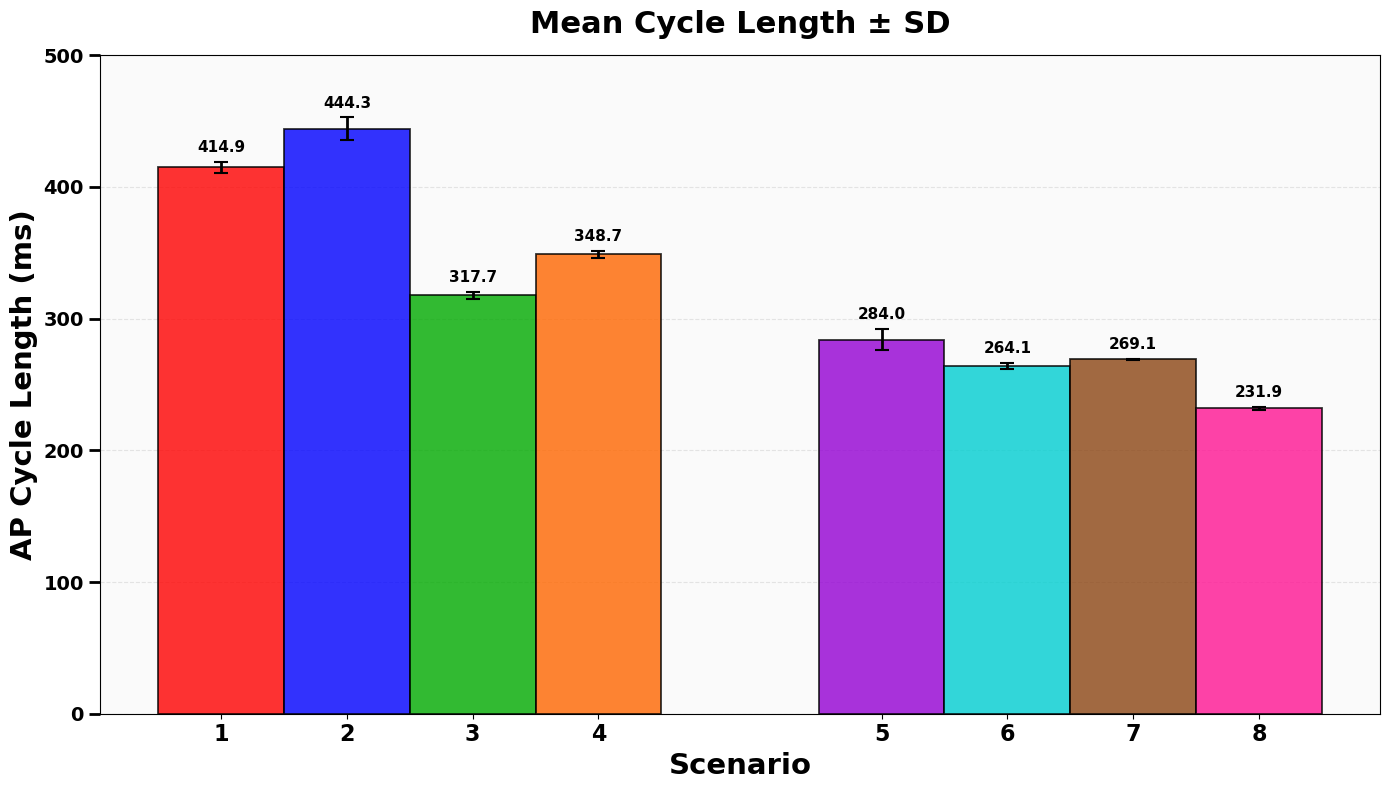


Statistics for each scenario (Mean ± SD):
------------------------------------------------------------
Basal conditions (1-4):
  Scenario 1: 414.9 ± 4.2 ms
  Scenario 2: 444.3 ± 8.5 ms
  Scenario 3: 317.7 ± 2.6 ms
  Scenario 4: 348.7 ± 3.0 ms

βAR stimulation (5-8):
  Scenario 5: 284.0 ± 8.1 ms
  Scenario 6: 264.1 ± 2.5 ms
  Scenario 7: 269.1 ± 0.6 ms
  Scenario 8: 231.9 ± 1.1 ms

Summary Table:
------------------------------------------------------------
 Scenario  Mean (ms)  SD (ms) Condition
        1 414.926088 4.185272     Basal
        2 444.275972 8.529582     Basal
        3 317.662742 2.641825     Basal
        4 348.727778 2.991593     Basal
        5 284.001560 8.123597       βAR
        6 264.088398 2.456390       βAR
        7 269.062502 0.569019       βAR
        8 231.928506 1.092219       βAR


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file - Windows path
file_path = r"C:\Users\venturasubirav2\Downloads\Analysis_simulations_dSTORM_paper_v01.xlsx"
df = pd.read_excel(file_path)

# Extract data from columns 1-8
means_from_excel = []
sds_from_excel = []

for i in range(1, 9):
    if i in df.columns:
        mean_val = df[i].iloc[0]
        sd_val = df[i].iloc[1]
        means_from_excel.append(mean_val)
        sds_from_excel.append(sd_val)

# Define colors matching your original figure
colors = ['#FF0000', '#0000FF', '#00AA00', '#FF6600', 
          '#9400D3', '#00CED1', '#8B4513', '#FF1493']

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Create grouped x positions with bars touching within groups
bar_width = 0.8
group_gap = 1.0  # Gap between basal and βAR groups

# Basal group (scenarios 1-4) - bars touching
x_pos_basal = np.arange(4) * bar_width

# βAR group (scenarios 5-8) - bars touching, with gap after basal
x_pos_bar = np.arange(4) * bar_width + 4 * bar_width + group_gap

x_pos = np.concatenate([x_pos_basal, x_pos_bar])

# Plot bars with SD error bars
bars = ax.bar(x_pos, means_from_excel, width=bar_width, color=colors, alpha=0.8,
              edgecolor='black', linewidth=1.3)
ax.errorbar(x_pos, means_from_excel, yerr=sds_from_excel, fmt='none', 
            color='black', capsize=5, elinewidth=2, capthick=1.5)

# Add value labels on top
for i, (pos, mean, sd) in enumerate(zip(x_pos, means_from_excel, sds_from_excel)):
    ax.text(pos, mean + sd + 5, f'{mean:.1f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting
ax.set_xlabel('Scenario', fontsize=21, fontweight='bold')
ax.set_ylabel('AP Cycle Length (ms)', fontsize=21, fontweight='bold')
ax.set_title('Mean Cycle Length ± SD', fontsize=22, fontweight='bold', pad=16)

# Custom x-tick labels with bold formatting
ax.set_xticks(x_pos)
ax.set_xticklabels([f'{i+1}' for i in range(8)], fontsize=16, fontweight='bold')

ax.set_ylim(0, 500)

# Make y-axis tick labels bold
ax.tick_params(axis='y', labelsize=14, width=2, length=8)
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')

# Grid and background
ax.grid(True, axis='y', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)
ax.set_facecolor('#fafafa')

plt.tight_layout()

# Save with Windows path
save_path = r"C:\Users\venturasubirav2\Downloads\Panel_B_grouped_SD_300dpi.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {save_path}")
plt.show()

# Print statistics
print("\n" + "="*60)
print("Statistics for each scenario (Mean ± SD):")
print("-" * 60)
print("Basal conditions (1-4):")
for i in range(4):
    print(f"  Scenario {i+1}: {means_from_excel[i]:.1f} ± {sds_from_excel[i]:.1f} ms")
print("\nβAR stimulation (5-8):")
for i in range(4, 8):
    print(f"  Scenario {i+1}: {means_from_excel[i]:.1f} ± {sds_from_excel[i]:.1f} ms")
    
# Create a summary dataframe for easy viewing
summary_df = pd.DataFrame({
    'Scenario': range(1, 9),
    'Mean (ms)': means_from_excel,
    'SD (ms)': sds_from_excel,
    'Condition': ['Basal']*4 + ['βAR']*4
})

print("\n" + "="*60)
print("Summary Table:")
print("-" * 60)
print(summary_df.to_string(index=False))

Figure saved to: C:\Users\venturasubirav2\Downloads\Panel_B_all40_simulations_300dpi.png


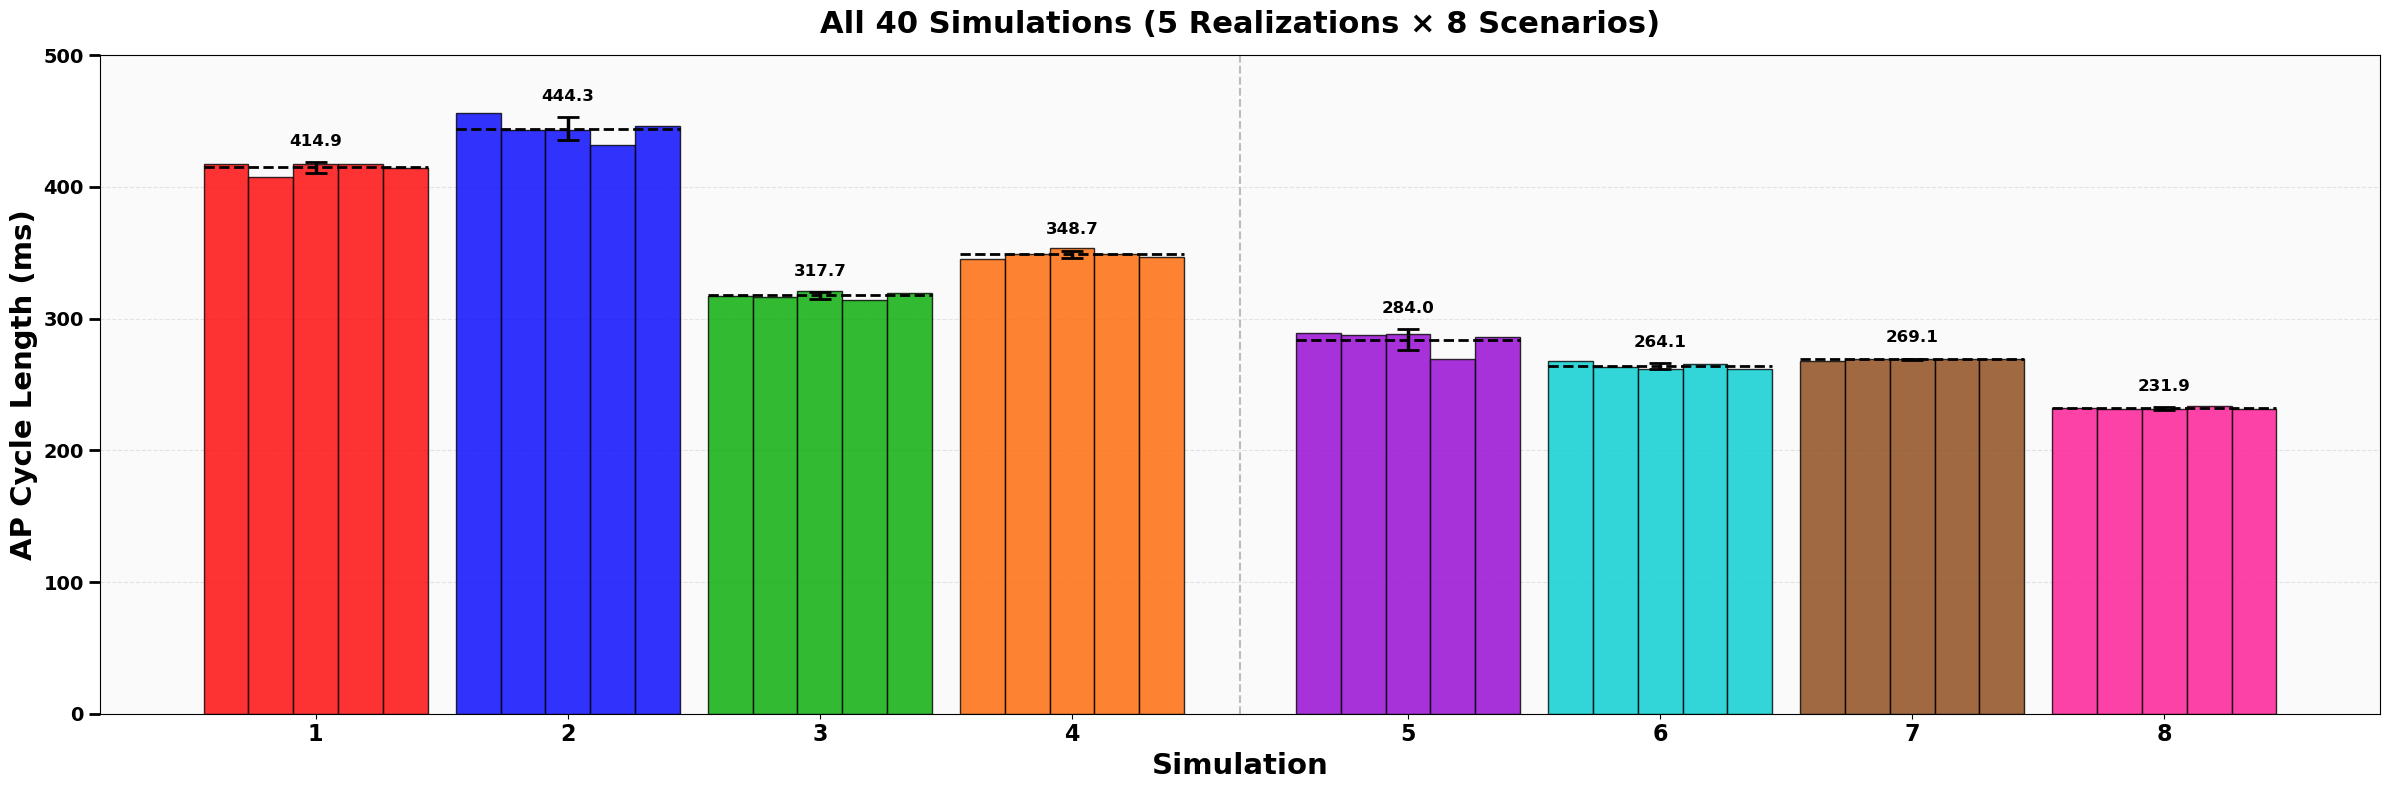


Individual Simulation Values:
------------------------------------------------------------

Scenario 1:
  Realization 1: 417.3 ms
  Realization 2: 407.8 ms
  Realization 3: 417.3 ms
  Realization 4: 417.8 ms
  Realization 5: 414.4 ms
  Mean: 414.9 ms, SD: 4.2 ms

Scenario 2:
  Realization 1: 456.0 ms
  Realization 2: 443.3 ms
  Realization 3: 443.3 ms
  Realization 4: 432.2 ms
  Realization 5: 446.5 ms
  Mean: 444.3 ms, SD: 8.5 ms

Scenario 3:
  Realization 1: 317.2 ms
  Realization 2: 316.4 ms
  Realization 3: 321.2 ms
  Realization 4: 314.3 ms
  Realization 5: 319.2 ms
  Mean: 317.7 ms, SD: 2.6 ms

Scenario 4:
  Realization 1: 345.5 ms
  Realization 2: 348.8 ms
  Realization 3: 353.3 ms
  Realization 4: 349.4 ms
  Realization 5: 346.7 ms
  Mean: 348.7 ms, SD: 3.0 ms

Scenario 5:
  Realization 1: 288.7 ms
  Realization 2: 287.7 ms
  Realization 3: 288.0 ms
  Realization 4: 269.6 ms
  Realization 5: 286.0 ms
  Mean: 284.0 ms, SD: 8.1 ms

Scenario 6:
  Realization 1: 267.6 ms
  Realiza

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r"C:\Users\venturasubirav2\Downloads\Analysis_simulations_dSTORM_paper_v01.xlsx"
df = pd.read_excel(file_path)

# Extract all individual realizations for each scenario
all_values = []
scenario_labels = []
scenario_colors = []

# Define colors for each scenario
colors = ['#FF0000', '#0000FF', '#00AA00', '#FF6600', 
          '#9400D3', '#00CED1', '#8B4513', '#FF1493']

# Extract individual values for each scenario
for scenario in range(1, 9):
    if scenario in df.columns:
        # Get individual simulation values (rows 4-8 are the 5 realizations)
        raw_values = df[scenario].iloc[4:9]
        
        # Clean the data
        values = []
        for v in raw_values:
            try:
                if isinstance(v, (int, float)) and not pd.isna(v):
                    values.append(float(v))
            except:
                continue
        
        # Add each realization as a separate bar
        for i, val in enumerate(values):
            all_values.append(val)
            scenario_labels.append(f'{scenario}.{i+1}')
            scenario_colors.append(colors[scenario-1])

# Calculate mean and SD for each group of 5
group_means = []
group_sds = []
for i in range(0, len(all_values), 5):
    group = all_values[i:i+5]
    if len(group) == 5:
        group_means.append(np.mean(group))
        group_sds.append(np.std(group, ddof=1))

# Create figure
fig, ax = plt.subplots(figsize=(24, 8))

# Create x positions for all 40 bars
bar_width = 0.8
x_positions = []
current_x = 0

for scenario in range(8):
    # 5 bars for each scenario
    for realization in range(5):
        x_positions.append(current_x)
        current_x += bar_width
    
    # Add gap after each scenario group except the last
    if scenario == 3:  # Bigger gap between basal and βAR
        current_x += 2.0
    elif scenario < 7:
        current_x += 0.5

# Plot all 40 bars
bars = ax.bar(x_positions, all_values, width=bar_width, 
              color=scenario_colors, alpha=0.8,
              edgecolor='black', linewidth=1.0)

# Add mean lines and values for each group of 5
for scenario in range(8):
    start_idx = scenario * 5
    end_idx = start_idx + 5
    
    if start_idx < len(x_positions) and end_idx <= len(x_positions):
        # Get positions and values for this scenario
        group_x = x_positions[start_idx:end_idx]
        group_vals = all_values[start_idx:end_idx]
        
        if group_vals:
            mean_val = np.mean(group_vals)
            sd_val = np.std(group_vals, ddof=1)
            
            # Draw horizontal line for mean
            ax.hlines(mean_val, group_x[0] - bar_width/2, 
                     group_x[-1] + bar_width/2,
                     colors='black', linestyles='--', linewidth=2)
            
            # Add mean value label
            center_x = (group_x[0] + group_x[-1]) / 2
            ax.text(center_x, mean_val + sd_val + 10, f'{mean_val:.1f}',
                   ha='center', va='bottom', fontsize=12, fontweight='bold')
            
            # Add error bar for SD at center of group
            ax.errorbar(center_x, mean_val, yerr=sd_val, 
                       fmt='none', color='black', capsize=8, 
                       elinewidth=2.5, capthick=2)

# Formatting
ax.set_xlabel('Simulation', fontsize=21, fontweight='bold')
ax.set_ylabel('AP Cycle Length (ms)', fontsize=21, fontweight='bold')
ax.set_title('All 40 Simulations (5 Realizations × 8 Scenarios)', 
             fontsize=22, fontweight='bold', pad=16)

# X-axis labels - show scenario groups
group_centers = []
for scenario in range(8):
    start_idx = scenario * 5
    end_idx = start_idx + 5
    if start_idx < len(x_positions) and end_idx <= len(x_positions):
        group_x = x_positions[start_idx:end_idx]
        group_centers.append((group_x[0] + group_x[-1]) / 2)

ax.set_xticks(group_centers)
ax.set_xticklabels([f'{i+1}' for i in range(8)], fontsize=16, fontweight='bold')

ax.set_ylim(0, 500)

# Make y-axis tick labels bold
ax.tick_params(axis='y', labelsize=14, width=2, length=8)
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

# Add dividing line between basal and βAR
divider_x = (x_positions[19] + x_positions[20]) / 2
ax.axvline(x=divider_x, color='gray', linestyle='--', alpha=0.5, linewidth=1.5)



# Grid and background
ax.grid(True, axis='y', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)
ax.set_facecolor('#fafafa')

plt.tight_layout()

# Save figure
save_path = r"C:\Users\venturasubirav2\Downloads\Panel_B_all40_simulations_300dpi.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {save_path}")
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("Individual Simulation Values:")
print("-" * 60)
for scenario in range(8):
    start_idx = scenario * 5
    end_idx = start_idx + 5
    values = all_values[start_idx:end_idx]
    
    if values:
        print(f"\nScenario {scenario+1}:")
        for i, val in enumerate(values):
            print(f"  Realization {i+1}: {val:.1f} ms")
        print(f"  Mean: {np.mean(values):.1f} ms, SD: {np.std(values, ddof=1):.1f} ms")